# Imports

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Data Loading

In [ ]:
!wget https://github.com/smmss79/DIP_2023/raw/main/HW1/images/images.zip

--2023-04-27 20:48:34--  https://github.com/smmss79/DIP_2023/raw/main/HW1/images/images.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW1/images/images.zip [following]
--2023-04-27 20:48:34--  https://raw.githubusercontent.com/smmss79/DIP_2023/main/HW1/images/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264332 (258K) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>] 258.14K  --.-KB/s    in 0.03s   

2023-04-27 20:48:34 (8.13 MB/s) - ‘images.zip’ saved [264332/264332]



In [ ]:
import pathlib
import urllib.request
import zipfile



IMAGES_PATH = "images"
PATH = pathli seeb.Path(IMAGES_PATH)
PATH.mkdir(exist_ok=True,parents=True)

path_to_zip_file = "images.zip"

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(IMAGES_PATH)

# Soal 1 (?) - indexed image

* kmeans --- failed
* histogram --- failed 
* manual list of unique items --- failed 
* using set data structure to find unique items --- failed 
* convert via color palette --- ok

## reading images

In [ ]:
im011 = cv2.imread("images/011.jpg")
im012 = cv2.imread("images/012.jpg")

## Visualization of images

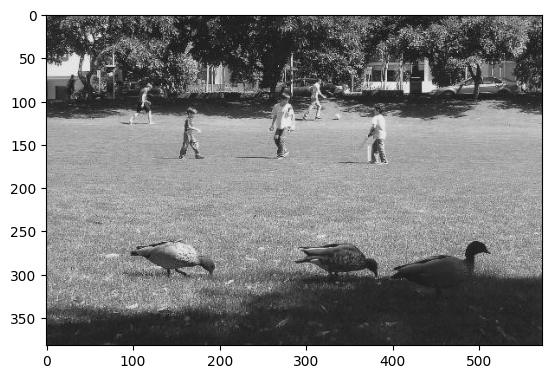

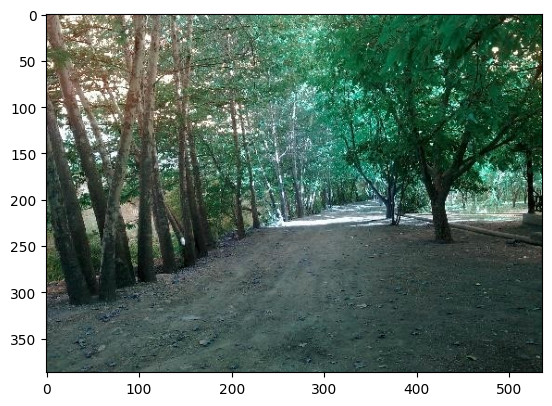

In [ ]:
plt.imshow(im011)
plt.show()

plt.imshow(im012)
plt.show()

2


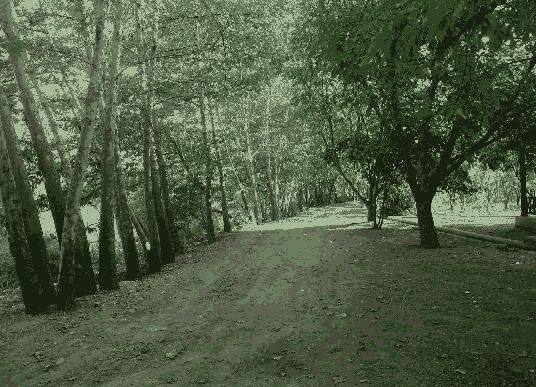

In [ ]:
# color palette 

import numpy as np
from PIL import Image
colorImage = Image.open("images/012.jpg")
imageWithColorPalette = colorImage.convert("P", palette=Image.ADAPTIVE, colors=8)
print (np.array(imageWithColorPalette)[0][0])
imageWithColorPalette

In [ ]:
# using set data structure 

im1 = set( im011.reshape((-1)) )
print(len(im1))

253


In [ ]:

# manual unique finding 

def RGB2Indexed(image):
    dict = [image[0][0]]
    for i in range(len(image)):
        for j in range(len(image[0])):
            for item in dict:
                #print(item)
                if image[i][j] == item:
                    continue
                else: 
                    dict.append(image[i][j])

    return dict

In [ ]:
print ( RGB2Indexed(im011))

KeyboardInterrupt: ignored

In [ ]:

# kmeans

from sklearn.cluster import KMeans
import numpy as np

print(im011[:,:,0:1].shape)

im011_reshaped = np.reshape(im011,(-1,3))

model = KMeans(n_clusters=25,random_state=42,n_init="auto")
model.fit(im011_reshaped)

(382, 573, 1)


KMeans(n_clusters=25, n_init='auto', random_state=42)

In [ ]:
model.cluster_centers_

array([[ 87.0458889 , 157.68056285, 125.72225139],
       [ 43.74909006,  47.37036864,  40.06355576],
       [140.60471807, 209.76682969, 183.43224971],
       [ 50.1135539 , 108.15816435,  83.50394877],
       [113.09548799, 186.36563801, 149.54258171],
       [187.27335047, 194.93144816, 189.6075407 ],
       [157.55860178, 168.37080192, 160.45407814],
       [ 62.05898923, 128.93338857, 100.36255178],
       [134.01264731, 142.4423685 , 135.34291463],
       [ 36.38591001,  39.30514483,  33.49643918],
       [ 32.33031609,  61.4237069 ,  44.76408046],
       [162.03081914, 225.29886456, 202.50486618],
       [119.36457993, 193.07480906, 159.59468634],
       [105.44245214, 178.61885147, 141.8718803 ],
       [ 55.08557152,  61.04913596,  53.1948782 ],
       [119.73575594, 111.46209062,  99.88649619],
       [ 74.52293453, 145.09377977, 114.35443038],
       [ 42.68380952,  84.01847619,  63.96285714],
       [ 97.42193787, 168.61306937, 134.56285208],
       [ 86.19796505,  98.21256

In [ ]:
def rgb2ind(image:np.ndarray,
            centers:np.ndarray):
            """ converts an RGB image to indexed image
            
            """
            newImage = np.zeros_like(image)
            for i in range(len(image)):
              for j in range(len(image[0])):
                leastDistanceItem = np.argmin( np.linalg.norm(image[i][j] - centers))
                print(leastDistanceItem)
                newImage[i][j] = centers[leastDistanceItem]


            return newImage 

In [ ]:
image_011_new = rgb2ind(im011,model.cluster_centers_)

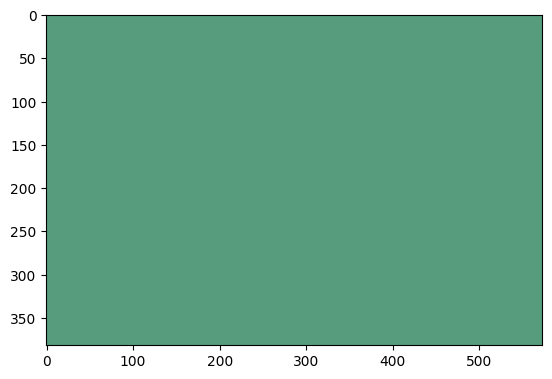

In [ ]:
plt.imshow(image_011_new)
plt.show()

# Soal 2

## reading image

In [ ]:
im021 = cv2.imread("images/021.jpg")
im022 = cv2.imread("images/021.jpg",0)

## test four different thresholds for best result 

In [ ]:
_, im023 = cv2.threshold(im022,40,255,0)
_, im024 = cv2.threshold(im022,50,255,0)
_, im025 = cv2.threshold(im022,60,255,0)
_, im026 = cv2.threshold(im022,70,255,0)


## seeing the tresholding result

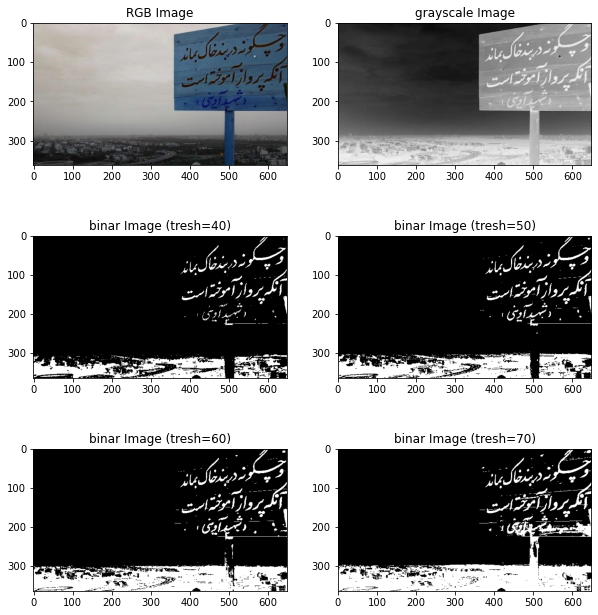

In [ ]:
plt.figure(figsize = (10,15))
subplot_rows,subplot_columns = 4,2

plt.subplot(subplot_rows,subplot_columns,1)
plt.title("RGB Image")
plt.imshow(im021)
plt.subplot(subplot_rows,subplot_columns,2)
plt.title("grayscale Image")
plt.imshow(im022,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,3)
plt.title("binar Image (tresh=40)")
plt.imshow(im023,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,4)
plt.title("binar Image (tresh=50)")
plt.imshow(im024,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,5)
plt.title("binar Image (tresh=60)")
plt.imshow(im025,cmap='gray_r')
plt.subplot(subplot_rows,subplot_columns,6)
plt.title("binar Image (tresh=70)")
plt.imshow(im026,cmap='gray_r')

plt.show()

## **best threshold was 50 so we crop "im024"**

In [ ]:
# find primary image size
print("image height: ",len(im024),", image width: ",len(im024[0]))

image height:  364 , image width:  649


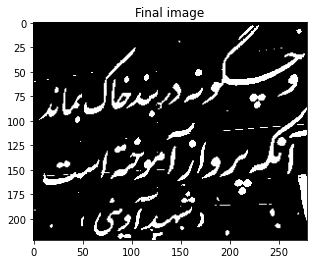

In [ ]:
# cropping image and display final result

cropped_im024 = im024[0:222,370:649]
plt.imshow(cropped_im024,cmap='gray_r')
plt.title("Final image")
plt.show()

# Soal 3

## Reading image

In [ ]:
im031 = cv2.imread("images/031.jpg")
im032 = cv2.imread("images/031.jpg",0)

## Seperate bit planes

In [ ]:
bits = [2**i for i in range(8)]
print("bit numbers:",bits)

bit_planes = [cv2.bitwise_and(im032,bit) for bit in bits]

bit numbers: [1, 2, 4, 8, 16, 32, 64, 128]


## Displaying images without each bit plane

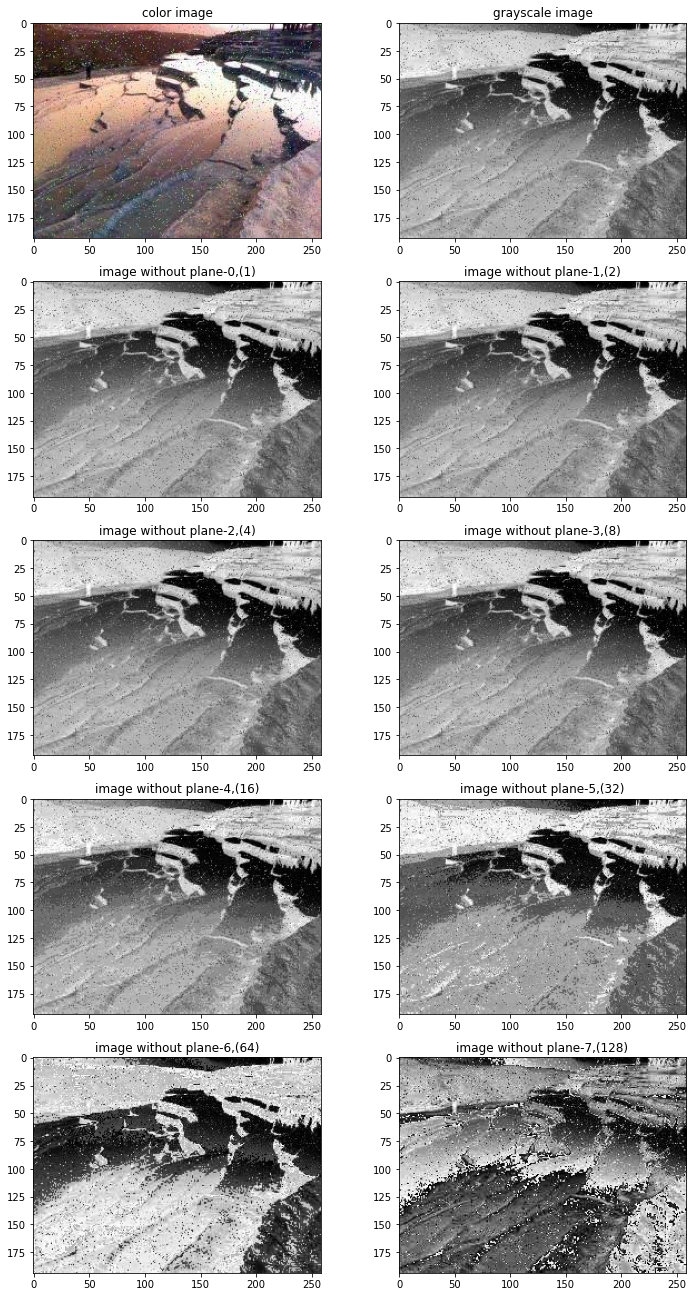

In [ ]:
plt.figure(figsize=(12,23))

plt.subplot(5,2,1)
plt.title("color image")
plt.imshow(im031)

plt.subplot(5,2,2)
plt.title("grayscale image")
plt.imshow(im032,cmap='gray_r')

for i in range(8):
    plt.subplot(5,2,3+i)
    plt.title("image without plane-{},({})".format(i,bits[i]))
    plt.imshow(im032-bit_planes[i],cmap='gray_r')
plt.show()

## final image (main image without bit planes 0,1,2)

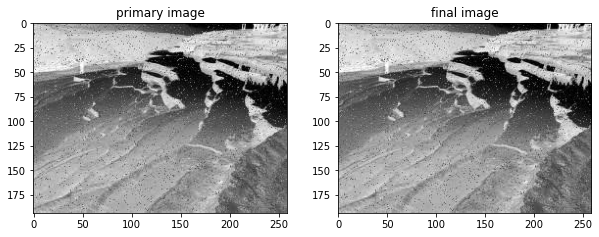

In [ ]:
final_image = im032 - (bit_planes[0]+bit_planes[1]+bit_planes[2]+bit_planes[3]+bit_planes[4]+bit_planes[5]+bit_planes[6])/127

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("primary image")
plt.imshow(im032,cmap='gray_r')
plt.subplot(1,2,2)
plt.title("final image")
plt.imshow(final_image,cmap='gray_r')
plt.savefig("final_image")
plt.show()

# Soal 4

In [ ]:
im041 = cv2.imread("images/041.jpg")

print('Original Dimensions : ',im041.shape)

scale_percent = 200 # percent of original size
width = int(im041.shape[1] * scale_percent / 100)
height = int(im041.shape[0] * scale_percent / 100)
dim = (width, height)

print(dim)

interpolation_methods = [cv2.INTER_AREA,
                         cv2.INTER_CUBIC,
                         cv2.INTER_LANCZOS4,
                         cv2.INTER_LINEAR,
                         cv2.INTER_NEAREST]
interpolation_methods_names = ["INTER_AREA",
                         "INTER_CUBIC",
                         "INTER_LANCZOS4",
                         "INTER_LINEAR",
                         "INTER_NEAREST"]


Original Dimensions :  (240, 155, 3)
(310, 480)


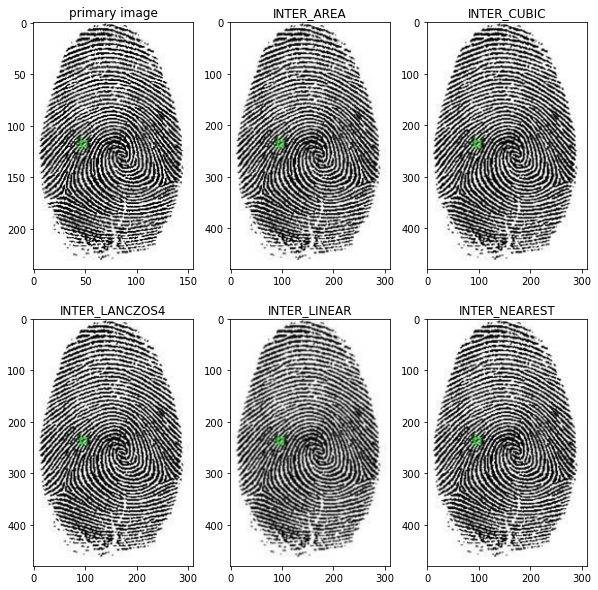

In [ ]:
sublot_number = 1

plt.figure(figsize=(10,10))
plt.subplot(2,3,sublot_number)
plt.title("primary image")
plt.imshow(im041)


for inter,inter_name in zip(interpolation_methods,interpolation_methods_names):
    sublot_number += 1
    resized = cv2.resize(im041, dim, interpolation = inter)
    plt.subplot(2,3,sublot_number)
    plt.title(inter_name)
    plt.imshow(resized)
plt.show()
